In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df

,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [2]:
df_ut=df.loc[df.State=="UT"]
df_ut=df_ut.drop(columns=["FIPS"])
df_ut

,State,County,MapDate,DSCI,Year
54800,UT,Carbon County,2000-01-04,0,2000
54801,UT,Carbon County,2000-01-11,0,2000
54802,UT,Carbon County,2000-01-18,0,2000
54803,UT,Carbon County,2000-01-25,0,2000
54804,UT,Carbon County,2000-02-01,0,2000
...,...,...,...,...,...
69043,UT,Wayne County,2020-12-01,473,2020
69044,UT,Wayne County,2020-12-08,473,2020
69045,UT,Wayne County,2020-12-15,473,2020
69046,UT,Wayne County,2020-12-22,473,2020


In [3]:
df_ut_groups=df_ut.groupby(["State","Year"]).mean()

In [4]:
df_ut_groups.reset_index()

,State,Year,DSCI
0,UT,2000,67.390533
1,UT,2001,44.437870
2,UT,2002,304.898403
3,UT,2003,405.809172
4,UT,2004,353.007396
5,UT,2005,71.143491
6,UT,2006,32.096154
7,UT,2007,196.331361
8,UT,2008,55.104499
9,UT,2009,39.102071


In [5]:
df_ut_groups=df_ut_groups.groupby(["State","Year"]).mean().reset_index()
df_ut_groups

,State,Year,DSCI
0,UT,2000,67.390533
1,UT,2001,44.437870
2,UT,2002,304.898403
3,UT,2003,405.809172
4,UT,2004,353.007396
5,UT,2005,71.143491
6,UT,2006,32.096154
7,UT,2007,196.331361
8,UT,2008,55.104499
9,UT,2009,39.102071


<AxesSubplot:xlabel='Year'>

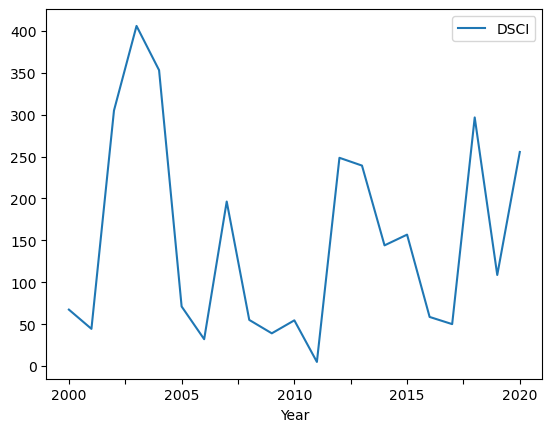

In [6]:
df_ut_groups.plot(x="Year")

In [7]:
df_ut_county_groups=df_ut.groupby(["County","Year"]).mean().reset_index()
df_ut_county_groups

,County,Year,DSCI
0,Carbon County,2000,54.750000
1,Carbon County,2001,50.923077
2,Carbon County,2002,269.037736
3,Carbon County,2003,399.769231
4,Carbon County,2004,350.307692
...,...,...,...
268,Wayne County,2016,40.961538
269,Wayne County,2017,56.826923
270,Wayne County,2018,349.423077
271,Wayne County,2019,125.830189


In [8]:
county_list=df_ut["County"].unique()
county_list

array(['Carbon County', 'Daggett County', 'Duchesne County',
       'Emery County', 'Garfield County', 'Grand County', 'Kane County',
       'San Juan County', 'Summit County', 'Uintah County',
       'Wasatch County', 'Washington County', 'Wayne County'],
      dtype=object)

Carbon County
Daggett County
Duchesne County
Emery County
Garfield County
Grand County
Kane County
San Juan County
Summit County
Uintah County
Wasatch County
Washington County
Wayne County


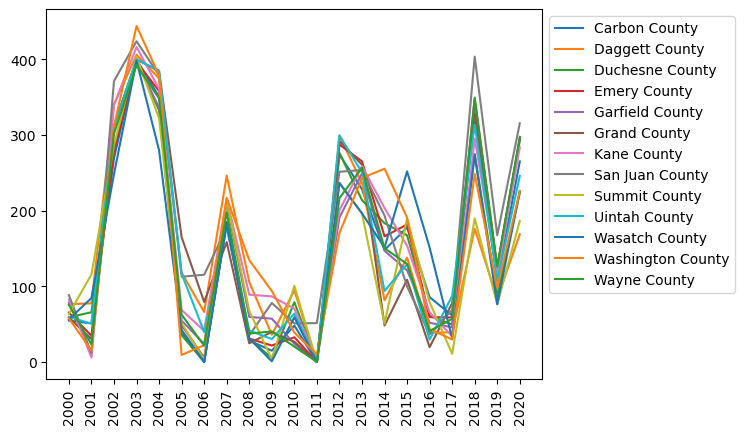

In [9]:
for county in county_list:
    print(county)
    df_ut_map=df_ut_county_groups.loc[df_ut_county_groups["County"]==county]
    df_ut_map=df_ut_map.drop(columns=["County"])
    df_ut_map=df_ut_map.rename(columns={"DSCI": county + " DSCI "})
    x2=df_ut_map["Year"].to_list()
    y2=df_ut_map[county + " DSCI "].to_list()
    plt.plot(x2,y2,label=county)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()